In [2]:
#Importamos librerias

import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas
import math
import matplotlib.pyplot as plt

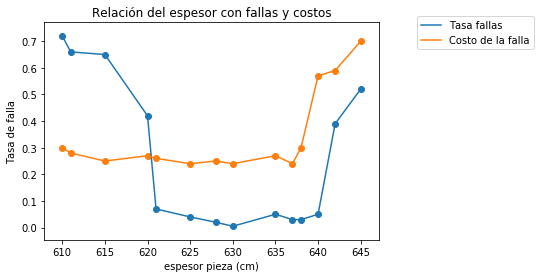

In [175]:
#Una empresa fabrica piezas de metal para dispositivos electrónicos
#Analísis de umbrales: se realiza un estudio para conocer la relación entre la variable espesor y
#la tasa de fallas de la pieza puesta en operación durante 1 mes
#622 y 638
espesor=[610,611,615,620,621,625,628,630,635,637,638,640,642,645]
tasa_fallas=[0.72,0.66,0.65,0.42,0.07,0.04,0.02,0.005,0.05,0.03,0.03,0.05,0.39,0.52]
costo_fallas=[0.3,0.28,0.25,0.27,0.26,0.24,0.25,0.24,0.27,0.24,0.3,0.57,0.59,0.7]

plt.scatter(espesor, tasa_fallas)
plt.plot(espesor, tasa_fallas)

plt.scatter(espesor, costo_fallas)
plt.plot(espesor, costo_fallas)


plt.ylabel("Tasa de falla")
plt.xlabel("espesor pieza (cm)")
plt.title("Relación del espesor con fallas y costos")
plt.legend(['Tasa fallas','Costo de la falla'], bbox_to_anchor=(1.1,1.05))

plt.show()


#Como resultado del análisis anterior, se establece la siguiente especificación ténica para el espesor de la pieza
#630 +- 8 cm
#LEI = 622 cm y LES = 638 cm

#### Como resultado del análisis anterior, se establece la siguiente especificación ténica para el espesor de la pieza
#630 +- 8 cm
#LEI = 622 cm y LES = 638 cm

In [176]:
#Una empresa fabrica piezas de metal, el espesor de estos productos es una característica 
#Crítica para la Calidad (CTQ).
#Generamos la población de productos que queremos estudiar durante 1 mes 
#la empresa fabrica 100 productos diarios de lunes a viernes (20 días /mes)

mu = 629
sigma = 3.15
size = 2000 #100*20 días

poblacion = np.random.RandomState(seed=1).normal(mu, sigma, size)


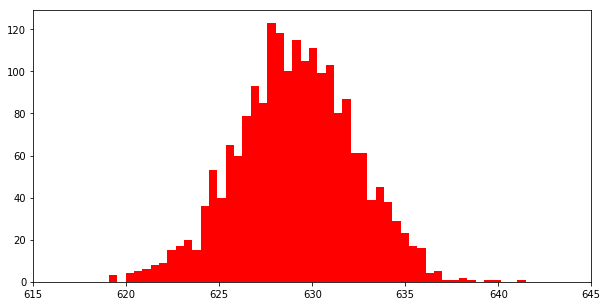

In [217]:
#Grafiquemos la distribución estadística de la variable "espesor" de la producción mensual

plt.figure(figsize=(10, 5))
plt.hist(poblacion, 50, color='r') #50 clases
plt.xticks(range(615,650,5))
plt.show()

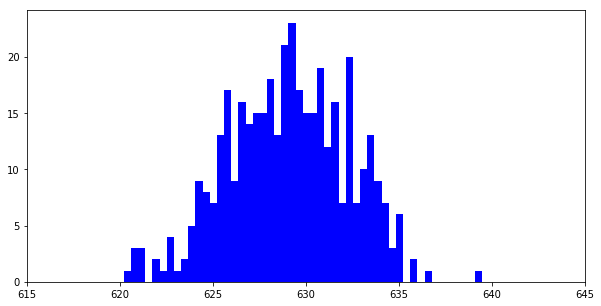

In [216]:
#Pero esta empresa no tiene la capacidad de medir pieza por pieza, por tanto aplicará
#un control estadístico de procesos, midiendo 20 piezas de forma aleatoria por día
#generemos la muestra completa de los 20 días muestreados

n=20 #tamaño muestral diario
d=20 #20 días estudiados

muestra20dias = np.random.RandomState(seed=1).choice(poblacion, (n*d))
plt.figure(figsize=(10, 5))
plt.hist(muestra20dias, 50, color='b') #50 clases
plt.xticks(range(615,650,5))
plt.show()


In [206]:
#Ahora listemos las muestras de cada día, de forma manual
 
muestra1 = muestra20dias[0:20] #Día 1
muestra2 = muestra20dias[20:40] #Día 2
muestra3 = muestra20dias[40:60] #Día 3
print('muestra 1:',muestra1)
np.mean(muestra1)

muestra 1: [629.58885169 625.11566968 632.41591847 629.30275955 630.27820381
 626.37795465 633.71904078 630.36328913 625.78851247 629.32776818
 630.66781577 631.71953775 630.76689188 629.81503886 626.71557298
 627.10635608 622.16226016 627.53317184 629.57844576 632.40544293]


629.0374251220514

In [207]:
#Ahora listemos las muestras de cada día de forma automática
t_muestra = 20 #tamaño de cada muestra tomada cada día
n_muestras = 20 #la cantidad de días (del día 1 al día 20)

muestras=[]

for i in range(0, n_muestras):
        muestras.append(muestra20dias[i*t_muestra:(i+1)*t_muestra])

print(muestras)

[array([629.58885169, 625.11566968, 632.41591847, 629.30275955,
       630.27820381, 626.37795465, 633.71904078, 630.36328913,
       625.78851247, 629.32776818, 630.66781577, 631.71953775,
       630.76689188, 629.81503886, 626.71557298, 627.10635608,
       622.16226016, 627.53317184, 629.57844576, 632.40544293]), array([631.80047397, 628.40080377, 631.37948489, 631.74355488,
       627.09115884, 620.20178225, 627.68488186, 625.6954366 ,
       628.58942291, 628.88859104, 633.36688993, 631.45708548,
       624.08247234, 621.33759819, 627.61715736, 632.32075216,
       628.14562955, 629.68176793, 627.04305692, 628.6795005 ]), array([636.63656585, 627.8823839 , 626.26652867, 627.10956278,
       634.15376263, 628.77038943, 625.33337489, 627.1556065 ,
       631.06192748, 635.16164855, 631.07439115, 628.57540164,
       628.76533314, 628.67891408, 632.51446068, 628.27942436,
       626.40922835, 624.06792483, 627.88098923, 625.83236875]), array([634.40882951, 624.62944451, 628.00384612,

In [220]:
#Ahora calculamos la media muestral (Xbar) y la desviación estandar muestral (S) para cada muestra
#Se aplicará la formula de Desv std insesgada multiplicando por: sqrt(n / n-1)

muestras=[]

for i in range(0, n_muestras):
        muestras.append(muestra20dias[i*t_muestra:(i+1)*t_muestra])

for i in range(0, n_muestras):
    print("muestra", i+1, "Xbar:", muestras[i].mean(), "S:", muestras[i].std()*(math.sqrt(t_muestra/(t_muestra-1))),"n:", len(muestras[i]))
    


muestra 1 Xbar: 629.0374251220514 S: 2.845411155362574 n: 20
muestra 2 Xbar: 628.2603750690073 S: 3.482293783696564 n: 20
muestra 3 Xbar: 629.0805093442799 S: 3.3716723047562343 n: 20
muestra 4 Xbar: 627.1843175581582 S: 3.2202262047641796 n: 20
muestra 5 Xbar: 629.2089895960399 S: 2.6436137507610393 n: 20
muestra 6 Xbar: 629.7082322104592 S: 2.9822910325610423 n: 20
muestra 7 Xbar: 628.8176579698019 S: 3.753258166275007 n: 20
muestra 8 Xbar: 628.315453615314 S: 3.8431409772704974 n: 20
muestra 9 Xbar: 628.1420187867313 S: 2.961539725125212 n: 20
muestra 10 Xbar: 628.5056944408303 S: 2.635305693006118 n: 20
muestra 11 Xbar: 628.4578397362727 S: 3.0843082712248697 n: 20
muestra 12 Xbar: 630.3434634130747 S: 2.831803084204534 n: 20
muestra 13 Xbar: 628.7253893068455 S: 3.6530207666376096 n: 20
muestra 14 Xbar: 628.2608320701167 S: 3.812034830974949 n: 20
muestra 15 Xbar: 628.7836157727509 S: 2.686115932949102 n: 20
muestra 16 Xbar: 629.2495288946254 S: 3.079672217587972 n: 20
muestra 17 

Xbar
629.0374251220514
628.2603750690073
629.0805093442799
627.1843175581582
629.2089895960399
629.7082322104592
628.8176579698019
628.315453615314
628.1420187867313
628.5056944408303
628.4578397362727
630.3434634130747
628.7253893068455
628.2608320701167
628.7836157727509
629.2495288946254
629.6454206596679
629.4962981589966
630.8490990995475
630.7590431348018
S
2.845411155362574
3.482293783696564
3.3716723047562343
3.2202262047641796
2.6436137507610393
2.9822910325610423
3.753258166275007
3.8431409772704974
2.961539725125212
2.635305693006118
3.0843082712248697
2.831803084204534
3.6530207666376096
3.812034830974949
2.686115932949102
3.079672217587972
2.3170812478165725
3.5031928779324435
3.709701959568129
2.9397491394668593
Mu^= 629.0415601979686
Sigma^= 3.1677716560970755


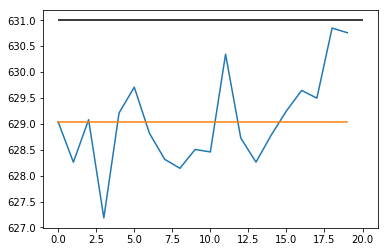

In [252]:
#Crearemos la lista de Xbarras (medias muestrales) y la lista de S (desv std muestrales)

muestras=[]

for i in range(0, n_muestras):
        muestras.append(muestra20dias[i*t_muestra:(i+1)*t_muestra])

print('Xbar')
lista_xbar=[]
for i in range(0, n_muestras):
    lista_xbar.append(muestras[i].mean())
    print(muestras[i].mean())

print('S')
lista_s=[]
for i in range(0, n_muestras):
    lista_s.append(muestras[i].std()*math.sqrt(20/(20-1)))
    print(muestras[i].std()*math.sqrt(20/(20-1)))

    
    
#Ahora vamos a inferir la media poblacional y la desv. std poblacional
#Media poblacional se infiere con Xbarra Barra (la media de las medias muestrales)
print('Mu^=',np.mean(lista_xbar))

#Desv std. poblacional se infiere con Smedio / d2 (la media de las desv std muestrales / c4 (tabla CEP))
#para n=20 ==> c4=0.9869
print('Sigma^=',np.mean(lista_s))



xbarbar=np.random.normal(np.mean(lista_xbar), 0, 20)

plt.plot(lista_xbar)
plt.hlines(y=631, xmin=0, xmax=20)
plt.plot(xbarbar)
plt.show()